# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
model = Sequential()
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [8]:
model.add(Dense(units=128,  
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [10]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [11]:
len(x_Train_normalize)

60000

In [12]:
len(y_Train_OneHot)

60000

In [13]:
train_history =model.fit(x_Train_normalize,
                         y_Train_OneHot,
                         validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9243 - val_loss: 0.1243 - val_accuracy: 0.9622
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0992 - accuracy: 0.9697 - val_loss: 0.0906 - val_accuracy: 0.9717
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0655 - accuracy: 0.9790 - val_loss: 0.0980 - val_accuracy: 0.9705
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0847 - val_accuracy: 0.9767
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0380 - accuracy: 0.9873 - val_loss: 0.0918 - val_accuracy: 0.9748
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0968 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.1029 - val_accuracy:

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

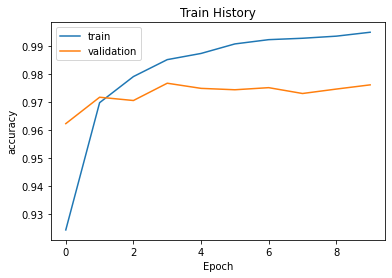

In [15]:
show_train_history(train_history,'accuracy','val_accuracy')

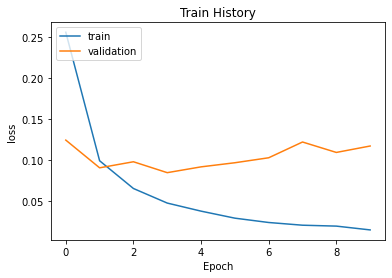

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1058 - accuracy: 0.9768

accuracy= 0.9768000245094299


In [18]:
model.predict(x_Train[0].reshape(-1, 784))

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

5
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
5


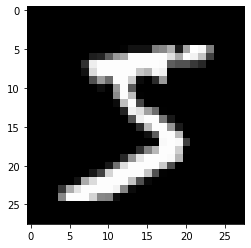

In [19]:
print(y_train_label[0])
print(model.predict(x_Train[0].reshape(-1, 784)))
print(np.argmax(model.predict(x_Train)[0]))
plt.imshow(x_train_image[0], cmap='gray')